In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Sep16 to Sep22 Predictions - Today is Sep16

In [2]:
hours1 = [11,12,13,14,15,16,17,18,19,20,21,22,23] #13
hours_def = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23] #24
hours8 = [0,1,2,3,4,5,6,7] #8

temp1 = [77,79,81,83,82,82,80,78,75,75,73,73,73]
temp2 = [73,72,72,72,72,71,71,71,72,73,75,77,78,79,79,80,80,79,78,76,74,73,73,72]
temp3 = [72,71,71,70,70,69,69,68,69,71,74,76,78,80,82,83,84,83,82,80,77,74,73,72]
temp4 = [71,71,70,70,69,69,68,68,69,72,75,77,79,81,82,83,82,81,79,76,72,68,67,66]
temp5 = [65,64,63,62,62,62,61,61,63,68,72,75,77,79,80,81,80,79,78,74,71,69,68,67]
temp6 = [67,66,65,65,64,64,64,64,66,69,72,74,76,78,79,79,79,78,76,73,70,67,66,64]
temp7 = [64,63,62,62,62,62,62,62,63,65,68,71,73,74,76,75,75,74,72,70,69,67,66,66]
temp8 = [66,67,67,67,66,65,63,61]

hum1 = [76,71,67,63,65,67,71,77,82,82,88,89,91]
hum2 = [91,92,92,92,92,93,94,95,92,88,82,78,74,73,71,70,70,70,72,76,81,85,86,87]
hum3 = [88,90,90,91,91,91,92,93,91,85,79,76,69,63,30,56,55,56,59,64,72,79,84,86]
hum4 = [88,88,90,90,92,92,93,92,86,77,68,62,57,54,52,49,48,50,53,60,68,78,80,83]
hum5 = [85,87,89,91,92,93,94,96,90,78,69,62,58,53,51,50,50,53,55,63,71,77,80,83]
hum6 = [86,88,90,91,92,92,93,94,92,85,77,71,67,63,60,59,57,56,57,62,71,80,85,90]
hum7 = [93,95,98,98,99,98,98,98,92,85,80,75,72,71,71,71,73,78,84,86,93,95,95,97]
hum8 = [98,98,97,98,95,92,89,84]

wind1 = [7,7,7,7,8,8,8,7,6,6,6,6,6]
wind2 = [6,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,7,6,6,6,6,6]
wind3 = [6,6,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,6,6,5,5,4,4]
wind4 = [4,5,5,5,6,6,6,6,6,7,7,7,7,7,7,7,8,8,7,6,6,6,6,6]
wind5 = [5,5,5,5,4,5,5,5,5,6,6,7,7,8,9,9,9,9,9,8,7,7,7,7]
wind6 = [6,6,6,5,5,5,6,6,6,6,7,7,8,8,8,9,9,10,9,9,8,7,7,7]
wind7 = [6,6,6,6,6,6,7,6,7,7,8,8,8,7,7,8,9,9,8,7,7,6,6,6]
wind8 = [6,6,6,6,7,7,7,7]

weat1 = [2,2,2,2,2,4,4,4,4,4,3,3,2]
weat2 = [2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,2,2]
weat3 = [2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
weat4 = [2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
weat5 = [3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3]
weat6 = [2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]
weat7 = [2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
weat8 = [3,3,3,3,3,3,3,3]

In [3]:
d_sep = {
    'Season': ['fall']*165,
    'Month': ['September']*165,
    'Hour': hours1 + hours_def*6 + hours8,
    'Holiday': [0]*165,
    'Weekday': ['Thursday']*13 + ['Friday']*24 + ['Saturday']*24 + ['Sunday']*24 + ['Monday']*24 + ['Tuesday']*24 + ['Wednesday']*24 + ['Thursday']*8,
    'Workday': [4]*13 + [5]*24 + [6]*24 + [0]*24 + [1]*24 + [2]*24 + [3]*24 + [4]*8,
    'Weather': weat1 + weat2 + weat3 + weat4 + weat5 + weat6 + weat7 + weat8,
    'Temperature': temp1 + temp2 + temp3 + temp4 + temp5 + temp6 + temp7 + temp8,
    'Humidity': [x/100 for x in hum1] + [x/100 for x in hum2] + [x/100 for x in hum3] + [x/100 for x in hum4] + [x/100 for x in hum5] + [x/100 for x in hum6] + [x/100 for x in hum7] + [x/100 for x in hum8],
    'Wind': [x/67 for x in wind1] + [x/67 for x in wind2] + [x/67 for x in wind3] + [x/67 for x in wind4] + [x/67 for x in wind5] + [x/67 for x in wind6] + [x/67 for x in wind7] + [x/67 for x in wind8]
}

prediction_data_sep = pd.DataFrame(d_sep)
prediction_data_sep['Weather'].replace({1:'Favorable', 2:'Relatively Favorable', 3:'Relatively Unfavorable', 4:'Unfavorable'}, inplace=True)

prediction_data_sep.loc[prediction_data_sep['Weekday']=='Thursday'].head(50)

,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,fall,September,11,0,Thursday,4,Relatively Favorable,77,0.76,0.104478
1,fall,September,12,0,Thursday,4,Relatively Favorable,79,0.71,0.104478
2,fall,September,13,0,Thursday,4,Relatively Favorable,81,0.67,0.104478
3,fall,September,14,0,Thursday,4,Relatively Favorable,83,0.63,0.104478
4,fall,September,15,0,Thursday,4,Relatively Favorable,82,0.65,0.119403
5,fall,September,16,0,Thursday,4,Unfavorable,82,0.67,0.119403
6,fall,September,17,0,Thursday,4,Unfavorable,80,0.71,0.119403
7,fall,September,18,0,Thursday,4,Unfavorable,78,0.77,0.104478
8,fall,September,19,0,Thursday,4,Unfavorable,75,0.82,0.089552
9,fall,September,20,0,Thursday,4,Unfavorable,75,0.82,0.089552


# Plotting Forecast for September

In [4]:
#import csv after seasonal model
df_sep = pd.read_csv(r"C:\Users\Jordan Kopper\Documents\Jordan\DSDP Project Group 7\Forecast_Sep_Fall.csv")

In [5]:
#drop encoded categorical values, add Hour and Average of Predictions
df_sep = df_sep.drop(df_sep.columns[10:34], axis=1)
df_sep = df_sep.drop(df_sep.columns[0], axis=1).join(prediction_data_sep['Hour'])
df_sep['AVG'] = df_sep['Label'].mean()

In [6]:
df_sep.head(50)

,Season,Month,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind,Label,Hour,AVG
0,fall,September,0,Thursday,4,2,77,0.76,0.104478,255.648676,11,235.80568
1,fall,September,0,Thursday,4,2,79,0.71,0.104478,351.198225,12,235.80568
2,fall,September,0,Thursday,4,2,81,0.67,0.104478,406.779701,13,235.80568
3,fall,September,0,Thursday,4,2,83,0.63,0.104478,389.691129,14,235.80568
4,fall,September,0,Thursday,4,2,82,0.65,0.119403,410.506600,15,235.80568
5,fall,September,0,Thursday,4,4,82,0.67,0.119403,416.892369,16,235.80568
6,fall,September,0,Thursday,4,4,80,0.71,0.119403,446.723876,17,235.80568
7,fall,September,0,Thursday,4,4,78,0.77,0.104478,346.333064,18,235.80568
8,fall,September,0,Thursday,4,4,75,0.82,0.089552,257.715402,19,235.80568
9,fall,September,0,Thursday,4,4,75,0.82,0.089552,230.190260,20,235.80568


<ipython-input-7-2410bdffc358>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212).set_xticklabels(['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thurdays','Friday'])
<ipython-input-7-2410bdffc358>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221).set_xticklabels(['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thurdays','Friday'])
<ipython-input-7-

<Figure size 432x288 with 0 Axes>

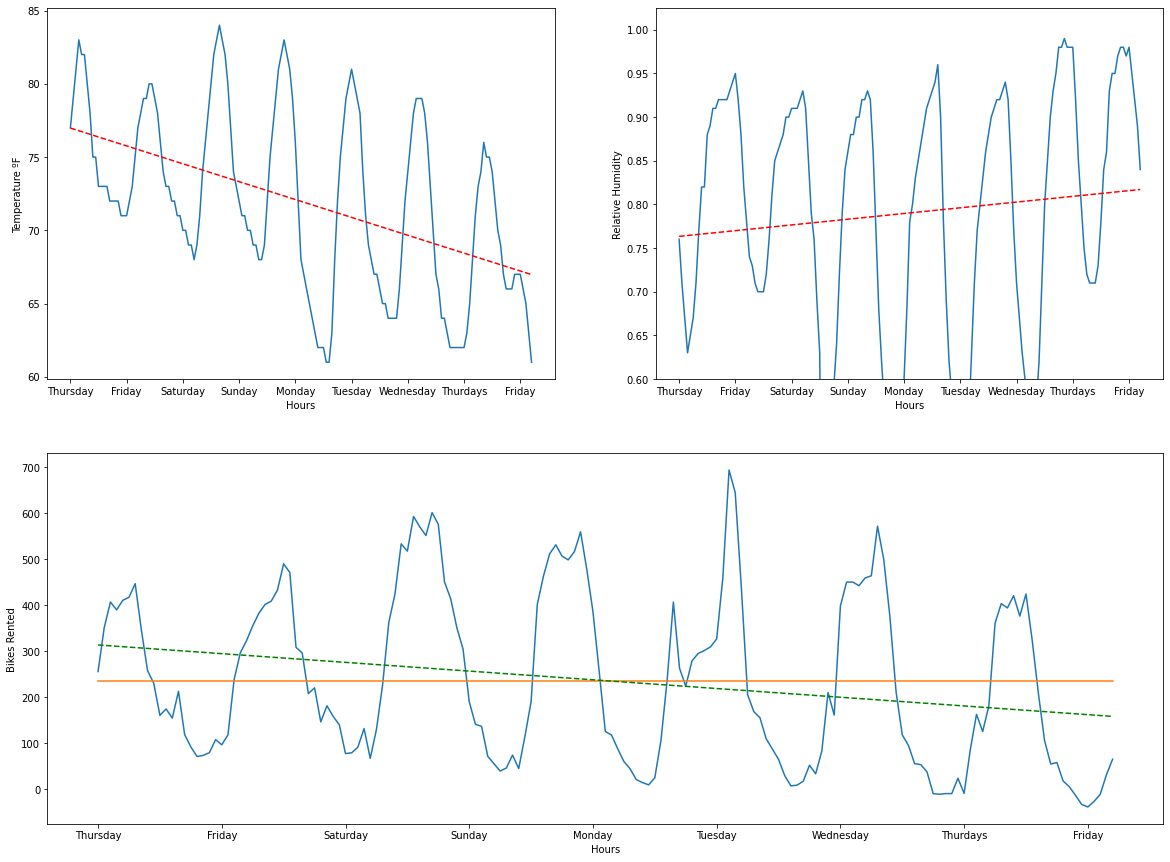

In [7]:
#Weekly Overview
plt.clf()
plt.figure(1)
plt.figure(figsize = (20, 15))

plt.subplot(212).set_xticks(np.arange(0, 164, 20))
plt.subplot(212).set_xticklabels(['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thurdays','Friday'])
plt.plot(df_sep.loc[:,['Label', 'AVG']], data = df_sep)
plt.ylabel('Bikes Rented')
plt.xlabel('Hours')

z = np.polyfit(df_sep.index, df_sep['Label'], 1)
p = np.poly1d(z)
plt.plot(df_sep.index,p(df_sep.index),"g--")

plt.subplot(221).set_xticks(np.arange(0, 164, 20))
plt.subplot(221).set_xticklabels(['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thurdays','Friday'])
plt.plot(df_sep.loc[:,['Temperature']], data = df_sep)
z = np.polyfit(df_sep.index, df_sep['Temperature'], 1)
p = np.poly1d(z)
plt.plot(df_sep.index,p(df_sep.index),"r--")
plt.ylabel('Temperature ºF')
plt.xlabel('Hours')

plt.subplot(222).set_xticks(np.arange(0, 164, 20))
plt.subplot(222).set_xticklabels(['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thurdays','Friday'])
plt.plot(df_sep.loc[:,['Humidity']], data = df_sep)
z = np.polyfit(df_sep.index, df_sep['Humidity'], 1)
p = np.poly1d(z)
plt.plot(df_sep.index,p(df_sep.index),"r--")
plt.ylabel('Relative Humidity')
plt.xlabel('Hours')
plt.ylim(bottom = 0.6)

plt.show()